Machine Learning

Model
a specification of a mathematical (or probabilistic) relationship that exists between different variables

machine learning
creating and using models that are learned from data.
also called predictive modeling or data mining
Examples:
Predicting whether an email message is spam or not
Predicting whether a credit card transaction is fraudulent
Predicting which advertisement a shopper is most likely to click on
Predicting which football team is going to win the Super Bowl


supervised models
There is a set of data labeled with the correct answers to learn from
Regression
Classification
unsupervised models
There are no such labels
Clustering
Anomaly detection
Association
Topic Modelling
Autoencoders


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
iris_target_df = pd.DataFrame(iris.target)
iris_target_df.head(2)

,0
0,0
1,0


In [3]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
def plot_tsne(data, target, target_names, learning_rate=100, perplexity=30):
    model = TSNE(learning_rate=learning_rate, perplexity=perplexity) #, metric='euclidean')
    embedded = model.fit_transform(data)
    xs = embedded[:,0]
    ys = embedded[:,1]
    for t in np.unique(target):
        i = np.where(target == t)
        plt.scatter(xs[i], ys[i], label=target_names[t])
 # plt.scatter(xs,ys,c=target,label=target)
    plt.legend(loc=1)
    plt.show()


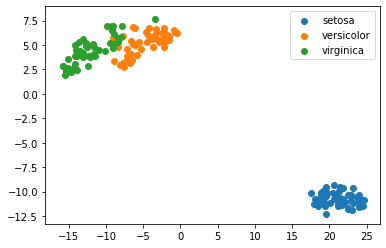

In [4]:
plot_tsne(iris.data, iris.target, iris.target_names)
# print(iris.data)

Take a look at YELP dataset
If you use iris.data for training, it is unsupervised learning
If you use iris.data and iris.target, it is supervised learning
Preparing dataset for supervised learning is very expensive.
Think about YELP dataset, too.
https://www.yelp.com/dataset/challenge (https://www.yelp.com/dataset/challenge)

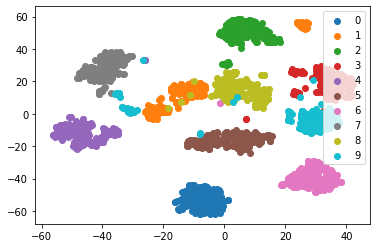

In [5]:
from sklearn import datasets
digits = datasets.load_digits()
plot_tsne(digits.data, digits.target, digits.target_names)

What we usually do
Choose a parameterized family of models and then use data to learn parameters that are in some way
optimal.
Examples:
A person’s height is (roughly) a linear function of his weight and then use data to learn what that linear
function is.
We might assume that a decision tree is a good way to diagnose what diseases our patients have and
then use data to learn the “optimal” such tree

Overfitting
A common danger in machine learning is overfitting
producing a model that performs well on the data you train it on
but that generalizes poorly to any new data.
This could involve learning noise in the data.
Or it could involve learning to identify specific inputs rather than whatever factors are actually predictive for
the desired output.

Underfitting
producing a model that doesn’t perform well even on the training data
Typically when this happens you decide your model isn’t good enough and keep looking for a better one.

Underfitting:
The horizontal line shows the best fit degree 0 (i.e., constant) polynomial. It severely underfits the training
data.
Overfitting
The best fit degree 9 (i.e., 10-parameter) polynomial goes through every training data point exactly, but it
very severely overfits — if we were to pick a few more data points it would quite likely miss them by a lot.
Best fitting
And the degree 1 line strikes a nice balance — it’s pretty close to every point, and (if these data are
representative) the line will likely be close to new data points as well.

Model complexity
Clearly models that are too complex lead to overfitting
and don’t generalize well beyond the data they were trained on.

Occam's razor
Exactly what Occam said: “More things should not be used than are necessary”.
"Simpler solutions are more likely to be correct than complex ones."
https://en.wikipedia.org/wiki/Occam%27s_razor#Science_and_the_scientific_method
(https://en.wikipedia.org/wiki/Occam%27s_razor#Science_and_the_scientific_method)

To avoid overfitting
Use different data to train the model and to test the model.
Training dataset
Test dataset
When you should choose from among many models:
Training dataset
Validation set for choosing among trained models
Test dataset

In [7]:
def split_data(data, prob):
    """split data into fractions [prob, 1 - prob]"""
    results = [], []
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
    return results
def train_test_split(x, y, test_pct):
    data = list(zip(x, y)) # pair corresponding values
    train, test = split_data(data, 1 - test_pct) # split the dataset of pairs
    x_train, y_train = list(zip(*train)) # magical un-zip trick
    x_test, y_test = list(zip(*test))
    return x_train, x_test, y_train, y_test

Use sklearn's train_test_split

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(12).reshape((6, 2)), list(range(6))
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train, y_train)
print(X_test, y_test)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
[0, 1, 2, 3, 4, 5]
[[6 7]
 [0 1]
 [2 3]
 [8 9]] [3, 0, 1, 4]
[[10 11]
 [ 4  5]] [5, 2]


A Story
I developed a cheap, noninvasive test that can be given to a newborn baby that predicts — with greater
than 98% accuracy — whether the newborn will ever develop leukemia.
My lawyer has convinced me the test is unpatentable.
The truth is "Predict leukemia if and only if the baby is named Luke", which sounds sort of like “leukemia”
why we don’t typically use “accuracy” to measure how good a model is.

Suppose a model to make a binary judgment.
Is this email spam?
Should we hire this candidate?
Is this air traveler secretly a terrorist?
AI judges whether a suspect is guilty or not
Doctor decides whether a patient has a cancer or not

Correctness

accuracy
the fraction of correct predictions:

In [9]:
def accuracy(tp, fp, fn, tn):
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct / total

In [10]:
print("accuracy(70, 4930, 13930, 981070) = {}".format(accuracy(70, 4930, 13930, 981070)))

accuracy(70, 4930, 13930, 981070) = 0.98114


precision, recall, f1_score
Precision measures how accurate our positive predictions were
Recall measures what fraction of the positives our model identified
F1 score: precision and recall are combined
This is the harmonic mean of precision and recall and necessarily lies between them

In [11]:
def precision(tp, fp, fn, tn):
    return tp / (tp + fp)
def recall(tp, fp, fn, tn):
    return tp / (tp + fn)
def f1_score(tp, fp, fn, tn):
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)
    return 2 * p * r / (p + r)

In [12]:
print("precision(70, 4930, 13930, 981070) = {}".format(precision(70, 4930, 13930, 981070)))
print("recall(70, 4930, 13930, 981070) = {}".format(recall(70, 4930, 13930, 981070)))
print("f1_score(70, 4930, 13930, 981070) = {}".format(f1_score(70, 4930, 13930, 981070)))

precision(70, 4930, 13930, 981070) = 0.014
recall(70, 4930, 13930, 981070) = 0.005
f1_score(70, 4930, 13930, 981070) = 0.00736842105263158


Use sklearn confusion matrix and classification_report:
Note that sklearn confusion is "Actual vs predicted" (sklearn)
Predicted vs actual (our textbook)
If you want to read in our textbook format, transpose the confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = ["cat", "ant", "cat", "cat", "ant", "cat"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
print(confusion_matrix(y_true, y_pred, labels=["ant", "cat"]).T)

[[2 1]
 [0 3]]


In [14]:
print(classification_report(y_true, y_pred, labels=["ant", "cat"]))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
         cat       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = ["cat", "ant", "cat", "cat", "ant", "cat", "bird", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat", "bird", "bird"]
print(confusion_matrix(y_true, y_pred, labels=["ant", "cat", "bird"]).T)
print(classification_report(y_true, y_pred, labels=["ant", "cat", "bird"]))

[[2 1 0]
 [0 3 0]
 [0 0 2]]
              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
         cat       1.00      0.75      0.86         4
        bird       1.00      1.00      1.00         2

    accuracy                           0.88         8
   macro avg       0.89      0.92      0.89         8
weighted avg       0.92      0.88      0.88         8



Trade-off between precision and recall
A model that predicts “yes” when it’s even a little bit confident will probably have a high recall but a low
precision;
A model that predicts “yes” only when it’s extremely confident is likely to have a low recall and a high
precision.
Alternatively, you can think of this as a trade-off between false positives and false negatives.
Saying “yes” too often will give you lots of false positives
Saying “no” too often will give you lots of false negatives
